In [22]:
import numpy as np
import pandas as pd
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding, SpatialDropout1D
from keras.layers import LSTM
from keras.datasets import imdb
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
max_words = 20_000
line_length = 80
batch_size = 32

In [24]:
# http://ai.stanford.edu/~amaas/data/sentiment/
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [25]:
# number of reviews
x_train.shape

(25000,)

In [26]:
# words in each review
for i in range(10):
    print(i, len(x_train[i]))

0 218
1 189
2 141
3 550
4 147
5 43
6 123
7 562
8 233
9 130


In [27]:
# sentiment, positive or negative
np.unique(y_train)

array([0, 1])

In [28]:
# mapping dictionaries
word_to_id = imdb.get_word_index()
id_to_word = {v:k for k,v in word_to_id.items()}

In [29]:
word_to_id['this']

11

In [30]:
id_to_word[11]

'this'

In [31]:
id_to_word[0] = '<START>'

In [32]:
def review(index):
    return ' '.join([id_to_word[max(0, idx-3)] for idx in x_train[index]])

In [33]:
review(0)

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <START> is an amazing actor and now the same being director <START> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the <START> of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [34]:
y_train[0]

1

In [35]:
# make all rows the same length
x_train = sequence.pad_sequences(x_train, maxlen=line_length)
x_test = sequence.pad_sequences(x_test, maxlen=line_length)

In [36]:
x_train.shape

(25000, 80)

In [37]:
x_train[:2]

array([[   15,   256,     4,     2,     7,  3766,     5,   723,    36,
           71,    43,   530,   476,    26,   400,   317,    46,     7,
            4, 12118,  1029,    13,   104,    88,     4,   381,    15,
          297,    98,    32,  2071,    56,    26,   141,     6,   194,
         7486,    18,     4,   226,    22,    21,   134,   476,    26,
          480,     5,   144,    30,  5535,    18,    51,    36,    28,
          224,    92,    25,   104,     4,   226,    65,    16,    38,
         1334,    88,    12,    16,   283,     5,    16,  4472,   113,
          103,    32,    15,    16,  5345,    19,   178,    32],
       [  125,    68,     2,  6853,    15,   349,   165,  4362,    98,
            5,     4,   228,     9,    43,     2,  1157,    15,   299,
          120,     5,   120,   174,    11,   220,   175,   136,    50,
            9,  4373,   228,  8255,     5,     2,   656,   245,  2350,
            5,     4,  9837,   131,   152,   491,    18,     2,    32,
         746

In [38]:
y_train[:2]

array([1, 0])

In [39]:
model = Sequential()
model.add(Embedding(max_words, 128))
model.add(LSTM(128, dropout=0.5, recurrent_dropout=0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(x_test, y_test))

Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 91s 4ms/step - loss: 0.5094 - acc: 0.7469 - val_loss: 0.4448 - val_acc: 0.7915
Epoch 2/10
25000/25000 [==============================] - 96s 4ms/step - loss: 0.3672 - acc: 0.8432 - val_loss: 0.3990 - val_acc: 0.8238
Epoch 3/10
25000/25000 [==============================] - 91s 4ms/step - loss: 0.2901 - acc: 0.8804 - val_loss: 0.3911 - val_acc: 0.8376
Epoch 4/10
25000/25000 [==============================] - 97s 4ms/step - loss: 0.2424 - acc: 0.9031 - val_loss: 0.4128 - val_acc: 0.8310
Epoch 5/10
25000/25000 [==============================] - 101s 4ms/step - loss: 0.2149 - acc: 0.9176 - val_loss: 0.4660 - val_acc: 0.8284
Epoch 6/10
25000/25000 [==============================] - 95s 4ms/step - loss: 0.1661 - acc: 0.9376 - val_loss: 0.4941 - val_acc: 0.8264
Epoch 7/10
25000/25000 [==============================] - 120s 5ms/step - loss: 0.1298 - acc: 0.9525 - val_loss: 0.5911 - val_a

In [41]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
loss, acc

25000/25000 [==============================] - 17s 684us/step


(0.7171711131763459, 0.819)

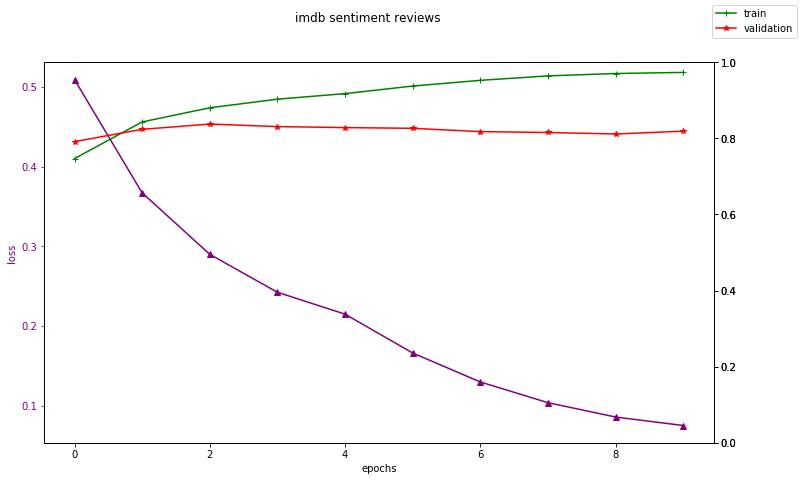

In [42]:
fig, ax1 = plt.subplots(1,1,figsize=(12,7))
ax1.plot(history.epoch, history.history['loss'], marker='^', color='purple')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss', color='purple')
ax1.tick_params('y', colors='purple')

ax2 = ax1.twinx()
plt.plot(history.epoch, history.history['acc'], marker='+', color='green', label='train')
ax2.set_ylim(0,1)

ax3 = ax1.twinx()
plt.plot(history.epoch, history.history['val_acc'], marker='*', color='red', label='validation')
ax3.set_ylim(0,1)

fig.suptitle('imdb sentiment reviews');
fig.legend();

In [43]:
embedding = model.get_layer('embedding_1').get_weights()
embedding[0].shape

(20000, 128)

```

"Word embeddings" are a family of natural language processing techniques aiming at mapping semantic meaning into a geometric space. This is done by associating a numeric vector to every word in a dictionary, such that the distance (e.g. L2 distance or more commonly cosine distance) between any two vectors would capture part of the semantic relationship between the two associated words. The geometric space formed by these vectors is called an embedding space.

For instance, "coconut" and "polar bear" are words that are semantically quite different, so a reasonable embedding space would represent them as vectors that would be very far apart. But "kitchen" and "dinner" are related words, so they should be embedded close to each other.

The most common application of this layer is for text processing. Let's see a simple example. Our training set consists only of two phrases:

Hope to see you soon
Nice to see you again

So we can encode these phrases by assigning each word a unique integer number (by order of appearance in our training dataset for example). Then our phrases could be rewritten as:

[0, 1, 2, 3, 4]
[5, 1, 2, 3, 6]

Now imagine we want to train a network whose first layer is an embeding layer. In this case, we should initialize it as follows:

Embedding(7, 2, input_length=5)

The first argument (7) is the number of distinct words in the training set. The second argument (2) indicates the size of the embedding vectors. The input_length argumet, of course, determines the size of each input sequence.

Once the network has been trained, we can get the weights of the embedding layer, which in this case will be of size (7, 2) and can be thought as the table used to map integers to embedding vectors:

+------------+------------+
|   index    |  Embedding |
+------------+------------+
|     0      | [1.2, 3.1] |
|     1      | [0.1, 4.2] |
|     2      | [1.0, 3.1] |
|     3      | [0.3, 2.1] |
|     4      | [2.2, 1.4] |
|     5      | [0.7, 1.7] |
|     6      | [4.1, 2.0] |
+------------+------------+

So according to these embeddings, our second training phrase will be represented as:

[[0.7, 1.7], [0.1, 4.2], [1.0, 3.1], [0.3, 2.1], [4.1, 2.0]]

- Word embeddings provide a dense representation of words and their relative meanings.
- They are an improvement over sparse representations used in simpler bag of word model representations.
- Word embeddings can be learned from text data and reused among projects. They can also be learned as part of fitting a neural network on text data.

```

In [44]:
#predict sentiment from reviews
bad = "this movie was terrible and bad"
good = "i really liked the movie and had fun"
for review in [good,bad]:
    tmp = []
    for word in review.split(" "):
        tmp.append(word_to_id[word])
    tmp_padded = sequence.pad_sequences([tmp], maxlen=line_length) 
    print("{}. Sentiment: {:.2f}".format(  review, model.predict(np.array([tmp_padded][0]))[0][0]  ))

i really liked the movie and had fun. Sentiment: 0.83
this movie was terrible and bad. Sentiment: 0.35
